In [3]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Paths
train_dir = '/Users/sukanya/Documents/Alziemers Multi Modal/Split Dataset/train'  
test_dir = '/Users/sukanya/Documents/Alziemers Multi Modal/Split Dataset/test'

In [5]:
#  Loading images and label
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  
    batch_size=32,         
    label_mode='int',       
    shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

Found 795 files belonging to 4 classes.
Found 201 files belonging to 4 classes.


In [6]:
# Class Names
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['Mild Dementia', 'Moderate Dementia', 'No Dementia', 'Severe Dementia ']


In [7]:
# Normalize the image data
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [8]:
input_shape = (256, 256, 3)

In [9]:
# Base Model
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

In [10]:
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 4)                 131076    
                                                                 
Total params: 14845764 (56.63 MB)
Trainable params: 131076 (512.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [12]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
# Training the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10 
)

Epoch 1/10
25/25 [==============================] - 73s 3s/step - loss: 1.4959 - accuracy: 0.6478 - val_loss: 0.2828 - val_accuracy: 0.9254
Epoch 2/10
25/25 [==============================] - 70s 3s/step - loss: 0.1115 - accuracy: 0.9811 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 70s 3s/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 72s 3s/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 72s 3s/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 72s 3s/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 72s 3s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 8/10
25/25 [==

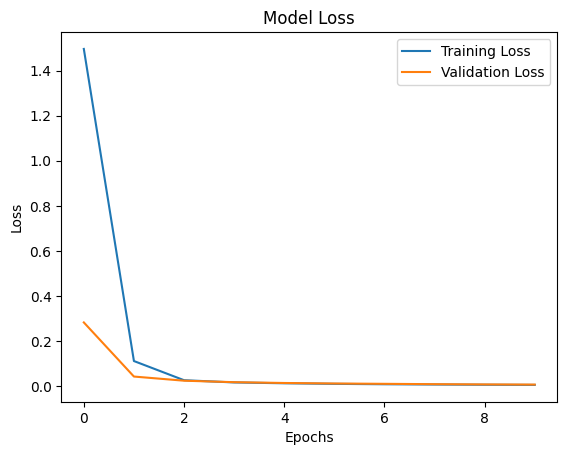

In [14]:
# Training & validation loss 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

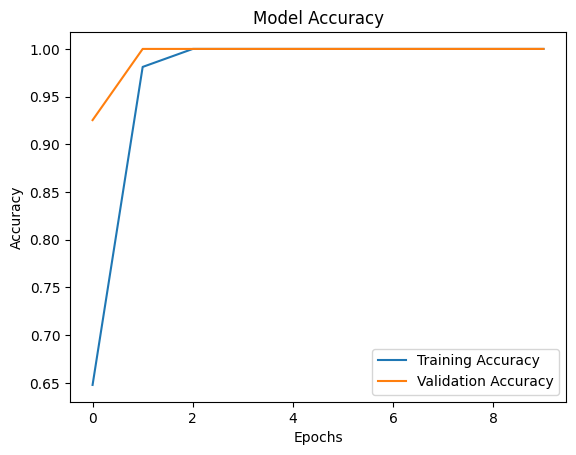

In [15]:
# Training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [16]:
# Metrics
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")
print(f"Final Training Accuracy: {final_train_acc}")
print(f"Final Validation Accuracy: {final_val_acc}")

Final Training Loss: 0.00557505339384079
Final Validation Loss: 0.007088907528668642
Final Training Accuracy: 1.0
Final Validation Accuracy: 1.0


7/7 [==============================] - 15s 2s/step


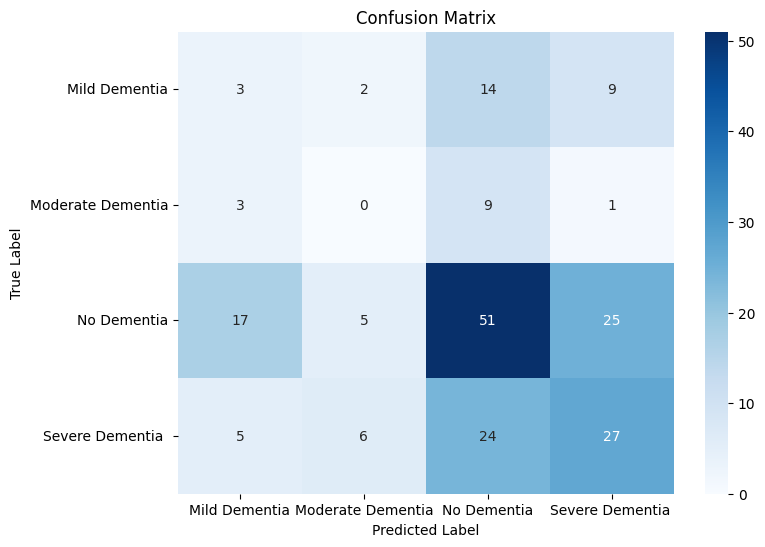

In [17]:
# Confusion Matrix
y_pred = np.argmax(model.predict(test_dataset), axis=-1)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()